In [ ]:
from tqdm.auto import tqdm
import os
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import pandas as pd
from matplotlib_venn import venn2
pd.set_option("display.max_colwidth", None)

In [2]:
driver = uc.Chrome(headless=False, use_subprocess=False)
driver.implicitly_wait(10)
driver.set_page_load_timeout(15)

In [3]:
driver.get("https://www.google.com/")

In [4]:
search_field = driver.find_element(By.TAG_NAME, "textarea")
search_field.clear()
search_field.send_keys("#parenting #timeout")
search_field.submit()

In [5]:
driver.find_element(By.LINK_TEXT, "Short videos").click()

In [6]:
for i in range(10):
    ActionChains(driver).scroll_by_amount(0, 10000).perform()
    time.sleep(1)

In [9]:
while True:
  try:
    driver.find_element(By.LINK_TEXT, "More results").click()
    print(len(driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")))
    time.sleep(1)
  except Exception as e:
    print(e)
    break

Message: element not interactable: element has zero size
  (Session info: chrome=141.0.7390.107)
Stacktrace:
#0 0x55b3b5c3667a <unknown>
#1 0x55b3b56b5566 <unknown>
#2 0x55b3b57086fb <unknown>
#3 0x55b3b56fb98b <unknown>
#4 0x55b3b572d632 <unknown>
#5 0x55b3b56fb307 <unknown>
#6 0x55b3b572d7fe <unknown>
#7 0x55b3b5753328 <unknown>
#8 0x55b3b572d403 <unknown>
#9 0x55b3b56f9b02 <unknown>
#10 0x55b3b56fa7c1 <unknown>
#11 0x55b3b5bfa448 <unknown>
#12 0x55b3b5bfe2af <unknown>
#13 0x55b3b5be18d9 <unknown>
#14 0x55b3b5bfee55 <unknown>
#15 0x55b3b5bc713f <unknown>
#16 0x55b3b5c234b8 <unknown>
#17 0x55b3b5c23693 <unknown>
#18 0x55b3b5c35613 <unknown>
#19 0x7f2072af1ac3 <unknown>



In [10]:
results = driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")
len(results)

342

In [11]:
parsed_results = []
for result in tqdm(results):
  link = result.find_elements(By.TAG_NAME, "a")[0].get_attribute("href")
  bits = result.text.split("\n")
  duration = bits[0]
  title = bits[1]
  bits = bits[2].split()
  source = bits[0]
  author = bits[-1]
  parsed_results.append({
    "link": link,
    "duration": duration,
    "title": title,
    "source": source,
    "author": author,
  })
df = pd.DataFrame(parsed_results)
df

  0%|          | 0/342 [00:00<?, ?it/s]

,link,duration,title,source,author
0,https://www.instagram.com/reel/DBjTKzcRj_3/,1:09,Comment 'Help' to learn more about Time-out Training I know ...,Instagram,livjowen
1,https://www.tiktok.com/@bratbustersparenting/video/7307422793077886214,0:33,Effective Parenting: Managing Timeout Strategies,TikTok,bratbustersparenting
2,https://www.instagram.com/reel/DCHwWHnPu89/?hl=en,1:29,✨ Let’s talk about when (and when not) to use time-outs with ...,Instagram,livjowen
3,https://www.instagram.com/reel/DLAH-Lsy1-w/,0:58,Why Timeouts Don't Work: A Parent's Guide to Calm Discipline ...,Instagram,bratbustersparenting
4,https://www.tiktok.com/@livjowen/video/7434987155497258282?lang=en,1:29,Understanding Time-Outs for Toddlers: A Quick Guide,TikTok,livjowen
...,...,...,...,...,...
337,https://www.tiktok.com/@rob_van_zuilen/video/7470516484565912854,1:54,#jegaatmaaréénkeerdood #soonontop ...,TikTok,rob_van_zuilen
338,https://www.tiktok.com/@mainanpunyagita/video/7257466719285857541,0:14,#tipsparenting #tidurbayi #newborn,TikTok,mainanpunyagita
339,https://www.tiktok.com/@arianacastaneda2/video/7438455471536753962,0:06,No pero ya encerio 🤔🤣 #normalicemos #trend #humor,TikTok,arianacastaneda2
340,https://www.tiktok.com/@failarmy/video/7541541593120001294,0:04,Enjoying Lake Life: Funny Dock Moments and Fails,TikTok,failarmy


In [12]:
df.source.value_counts()

source
Instagram     135
TikTok        131
YouTube        62
Facebook        5
Pinterest       4
Lemon8-app      4
NewsBreak       1
Name: count, dtype: int64

In [13]:
df[df.duplicated(subset=["duration", "title"], keep=False)]

,link,duration,title,source,author
36,https://www.pinterest.com/pin/117867715242427325/,0:39,Should I Put My Child in Timeout? Here's an Alternative ...,Pinterest,ralphie
59,https://www.instagram.com/reel/Co4Iji-gTOZ/?hl=en,0:34,Timeout (naughty corner) is a form of punishment. Yeah ...,Instagram,mamaslearn
130,https://www.instagram.com/reel/CtrlErRtvPu/,1:24,"Dr David Coleman on Instagram: ""Q&A Will I turn my children's ...",Instagram,davidcoleman.ie
132,https://www.instagram.com/reel/CtrlErRtvPu/,1:24,"Dr David Coleman on Instagram: ""Q&A Will I turn my children's ...",Instagram,davidcoleman.ie
148,https://in.pinterest.com/pin/1085508316431021023/,0:39,Should I Put My Child in Timeout? Here's an Alternative ...,Pinterest,ralphie
229,https://www.tiktok.com/@mamaslearn/video/7202309852528463106,0:34,Timeout (naughty corner) is a form of punishment. Yeah ...,TikTok,mamaslearn


In [16]:
search_field = driver.find_element(By.TAG_NAME, "textarea")
search_field.clear()
search_field.send_keys("#gentleparenting #timeout")
search_field.submit()

In [17]:
for i in range(10):
    ActionChains(driver).scroll_by_amount(0, 10000).perform()
    time.sleep(1)

In [19]:
while True:
  try:
    driver.find_element(By.LINK_TEXT, "More results").click()
    print(len(driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")))
    time.sleep(1.5)
  except Exception as e:
    print(e)
    break

Message: element not interactable: element has zero size
  (Session info: chrome=141.0.7390.107)
Stacktrace:
#0 0x55b3b5c3667a <unknown>
#1 0x55b3b56b5566 <unknown>
#2 0x55b3b57086fb <unknown>
#3 0x55b3b56fb98b <unknown>
#4 0x55b3b572d632 <unknown>
#5 0x55b3b56fb307 <unknown>
#6 0x55b3b572d7fe <unknown>
#7 0x55b3b5753328 <unknown>
#8 0x55b3b572d403 <unknown>
#9 0x55b3b56f9b02 <unknown>
#10 0x55b3b56fa7c1 <unknown>
#11 0x55b3b5bfa448 <unknown>
#12 0x55b3b5bfe2af <unknown>
#13 0x55b3b5be18d9 <unknown>
#14 0x55b3b5bfee55 <unknown>
#15 0x55b3b5bc713f <unknown>
#16 0x55b3b5c234b8 <unknown>
#17 0x55b3b5c23693 <unknown>
#18 0x55b3b5c35613 <unknown>
#19 0x7f2072af1ac3 <unknown>



In [20]:
results = driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")
len(results)

130

In [21]:
parsed_results = []
for result in tqdm(results):
  link = result.find_elements(By.TAG_NAME, "a")[0].get_attribute("href")
  bits = result.text.split("\n")
  duration = bits[0]
  title = bits[1]
  bits = bits[2].split()
  source = bits[0]
  author = bits[-1]
  parsed_results.append({
    "link": link,
    "duration": duration,
    "title": title,
    "source": source,
    "author": author,
  })
df2 = pd.DataFrame(parsed_results)
df2

  0%|          | 0/130 [00:00<?, ?it/s]

,link,duration,title,source,author
0,https://www.youtube.com/shorts/vrFlAkzWns8,1:00,Breaking Down My Time-Out Process for Toddlers ...,YouTube,Owen
1,https://www.instagram.com/reel/DBjTKzcRj_3/,1:09,Comment 'Help' to learn more about Time-out Training I know ...,Instagram,livjowen
2,https://www.instagram.com/reel/DCHwWHnPu89/?hl=en,1:29,✨ Let’s talk about when (and when not) to use time-outs with ...,Instagram,livjowen
3,https://www.instagram.com/reel/DMW-CDDuQNr/,1:58,Teaching Healthy Boundaries to Kids: What is Time Out Really ...,Instagram,jofrost
4,https://www.tiktok.com/@livjowen/video/7434987155497258282?lang=en,1:29,Understanding Time-Outs for Toddlers: A Quick Guide,TikTok,livjowen
...,...,...,...,...,...
125,https://www.tiktok.com/@tanyaamanda07/video/7328037946756451626,0:57,Petite curvy GDWM office edition 💙 PETITE ALSO MEANS ...,TikTok,tanyaamanda07
126,https://www.tiktok.com/@tirsanastasiaa/video/7380994866991402245,2:55,Cara Membuat Budgeting Keuangan Bulanan Menarik dan ...,TikTok,tirsanastasiaa
127,https://www.tiktok.com/@ministerioetan/video/7357673679007796485?lang=en,1:28,Un Día Orando Le Dije A Mi Señor - Alfarero y Barro,TikTok,ministerioetan
128,https://www.tiktok.com/@elaudio13/video/7542066090868739334,0:48,Paket 8 Inc untuk Miniatur Sound System,TikTok,elaudio13


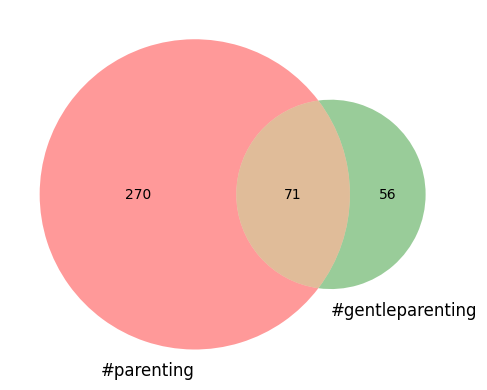

In [ ]:
venn2([set(df.link), set(df2.link)], set_labels = ('#parenting', '#gentleparenting'))

In [23]:
df = pd.concat([df, df2]).drop_duplicates()
df

,link,duration,title,source,author
0,https://www.instagram.com/reel/DBjTKzcRj_3/,1:09,Comment 'Help' to learn more about Time-out Training I know ...,Instagram,livjowen
1,https://www.tiktok.com/@bratbustersparenting/video/7307422793077886214,0:33,Effective Parenting: Managing Timeout Strategies,TikTok,bratbustersparenting
2,https://www.instagram.com/reel/DCHwWHnPu89/?hl=en,1:29,✨ Let’s talk about when (and when not) to use time-outs with ...,Instagram,livjowen
3,https://www.instagram.com/reel/DLAH-Lsy1-w/,0:58,Why Timeouts Don't Work: A Parent's Guide to Calm Discipline ...,Instagram,bratbustersparenting
4,https://www.tiktok.com/@livjowen/video/7434987155497258282?lang=en,1:29,Understanding Time-Outs for Toddlers: A Quick Guide,TikTok,livjowen
...,...,...,...,...,...
124,https://www.tiktok.com/@cataquirogaofficial/video/7507380420506520837,0:38,La película de @C. A. Independiente ❤️ #independiente ...,TikTok,cataquirogaofficial
125,https://www.tiktok.com/@tanyaamanda07/video/7328037946756451626,0:57,Petite curvy GDWM office edition 💙 PETITE ALSO MEANS ...,TikTok,tanyaamanda07
127,https://www.tiktok.com/@ministerioetan/video/7357673679007796485?lang=en,1:28,Un Día Orando Le Dije A Mi Señor - Alfarero y Barro,TikTok,ministerioetan
128,https://www.tiktok.com/@elaudio13/video/7542066090868739334,0:48,Paket 8 Inc untuk Miniatur Sound System,TikTok,elaudio13


In [24]:
df[df.duplicated(subset=["duration", "title"], keep=False)]

,link,duration,title,source,author
36,https://www.pinterest.com/pin/117867715242427325/,0:39,Should I Put My Child in Timeout? Here's an Alternative ...,Pinterest,ralphie
52,https://www.instagram.com/reel/C84_zmkvrzb/?hl=en,1:05,"We are ready for timeout training, (thank goodness!) so I set ...",Instagram,livjowen
59,https://www.instagram.com/reel/Co4Iji-gTOZ/?hl=en,0:34,Timeout (naughty corner) is a form of punishment. Yeah ...,Instagram,mamaslearn
148,https://in.pinterest.com/pin/1085508316431021023/,0:39,Should I Put My Child in Timeout? Here's an Alternative ...,Pinterest,ralphie
229,https://www.tiktok.com/@mamaslearn/video/7202309852528463106,0:34,Timeout (naughty corner) is a form of punishment. Yeah ...,TikTok,mamaslearn
51,https://www.tiktok.com/@livjowen/video/7386742111510564139,1:05,"We are ready for timeout training, (thank goodness!) so I set ...",TikTok,livjowen


In [25]:
df.source.value_counts()

source
TikTok        168
Instagram     149
YouTube        64
Facebook        6
Lemon8-app      5
Pinterest       4
NewsBreak       1
Name: count, dtype: int64

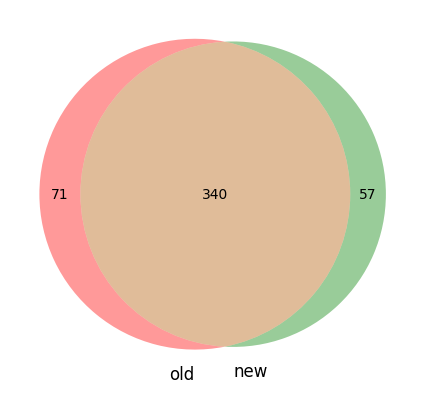

In [ ]:
old_df = pd.read_csv("googlesearch.csv")
venn2([set(old_df.link), set(df.link)], set_labels = ('old', 'new'))

In [29]:
df[~df.link.isin(old_df.link)]

,link,duration,title,source,author
48,https://www.youtube.com/shorts/9mJxPuoNmiY,0:39,Time Out Makes Kids Feel Like Crap #timeout ...,YouTube,Parenting
65,https://www.tiktok.com/@walkers.therapy/video/7560412892575698198,1:29,Why Time Outs Fail in Parenting and What Works,TikTok,walkers.therapy
66,https://www.instagram.com/reel/DIRUwdYN5Zg/,0:34,This is definitely only about talking to petulant children about ...,Instagram,heylindseybarnes
84,https://www.instagram.com/reel/DKH-3wHMcKJ/,2:03,"Dr David Coleman on Instagram: ""Q&A 12 year old crying a lot ...",Instagram,davidcoleman.ie
99,https://www.instagram.com/reel/DGygrwnTAom/?hl=en,0:15,"AmourDusha on Instagram: ""When mom puts the kid in time ...",Instagram,amourdusha
101,https://www.instagram.com/reel/DFSg-hEMkxA/,1:25,"Dr David Coleman on Instagram: ""Q&A should I let my 12 year ...",Instagram,davidcoleman.ie
105,https://in.pinterest.com/pin/1007117535423969304/,2:31,Timeout vs. Breaks - Respectful Parenting Toddler,Pinterest,cassiemomcoach
128,https://www.tiktok.com/@camillesmiith/video/7513563386567822638,0:22,Understanding Timeout Discipline for Kids,TikTok,camillesmiith
133,https://www.youtube.com/shorts/yPgaWCLhWlE,1:00,Setting up my toddler's timeout corner #gentleparent #momlife ...,YouTube,Owen
148,https://in.pinterest.com/pin/1085508316431021023/,0:39,Should I Put My Child in Timeout? Here's an Alternative ...,Pinterest,ralphie


In [30]:
df = pd.concat([df, old_df]).drop_duplicates()
df

,link,duration,title,source,author
0,https://www.instagram.com/reel/DBjTKzcRj_3/,1:09,Comment 'Help' to learn more about Time-out Training I know ...,Instagram,livjowen
1,https://www.tiktok.com/@bratbustersparenting/video/7307422793077886214,0:33,Effective Parenting: Managing Timeout Strategies,TikTok,bratbustersparenting
2,https://www.instagram.com/reel/DCHwWHnPu89/?hl=en,1:29,✨ Let’s talk about when (and when not) to use time-outs with ...,Instagram,livjowen
3,https://www.instagram.com/reel/DLAH-Lsy1-w/,0:58,Why Timeouts Don't Work: A Parent's Guide to Calm Discipline ...,Instagram,bratbustersparenting
4,https://www.tiktok.com/@livjowen/video/7434987155497258282?lang=en,1:29,Understanding Time-Outs for Toddlers: A Quick Guide,TikTok,livjowen
...,...,...,...,...,...
406,https://www.tiktok.com/@cynthiajessica117/video/7335046819203779873,0:58,Por fin! Gloria Trevi demandará a Sergio Andrade ...,TikTok,cynthiajessica117
407,https://www.tiktok.com/@fedfreestyle/video/7519461553020669206,1:14,Il calciatore che perse un dito per esultanza,TikTok,fedfreestyle
408,https://www.tiktok.com/@artgrfite2/video/7227962410596945157?lang=en,0:12,desenhos para fazer no caderno #graffiti #Anime #arte ...,TikTok,artgrfite2
409,https://www.tiktok.com/@putiadellostello/video/7395608101220551969,0:25,Il ristorante con grotta lavica a Catania,TikTok,putiadellostello


In [31]:
df.to_csv("googlesearch.csv", index=False)

In [34]:
df.link.to_csv("links.txt",index=False,header=False)